In [151]:
%reset -f


#McKeon, B. J., Swanson, C. J., Zagarola, M. V., Donnelly, R. J., & SMITS, A. J. (2004). 
#Friction factors for smooth pipe flow. Journal of Fluid Mechanics, 511, 41-44.


In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
oregon_smooth=np.array([[11.21,5.537],[20.22,3.492],[29.28,2.329],[43.19,1.523],[57.73,1.173],
[64.58,0.9863],[86.05,0.7826],[113.3,0.5709],[135.3,0.4815],[157.5,0.4182],[179.4,0.3655],
[206.4,0.3237],[228,0.2884],[270.9,0.2433],[315.2,0.2077],[358.9,0.1834],[402.9,0.1656],[450.2,0.1475],
[522.5,0.1245],[583.1,0.1126],[671.8,0.09917],[789.8,0.08501],[891,0.07722],[1013,0.06707],[1197,0.0588],
[1300,0.05328],[1390,0.04815],[1669,0.04304],[1994,0.03739],[2227,0.03405],[2554,0.03091],[2868,0.02804],
[2903,0.03182],[2926,0.03846],[2955,0.03363],[2991,0.04124],[2997,0.035],[3047,0.03875],[3080,0.04285],
[3264,0.0426],[3980,0.03995],[4835,0.03797],[5959,0.0361],[8162,0.03364],[10900,0.03088],[13650,0.02903],
[18990,0.0267],[29430,0.02386],[40850,0.02086],[59220,0.02],[84760,0.01805],[120000,0.01686],[176000,0.01594],
[237700,0.01511],[298200,0.01462],[467800,0.01365],[587500,0.01313],[824200,0.01244],[1050000,0.01198]])

In [4]:
princeton_smooth=np.array([[31310,0.02364],[41440,0.02216],[56360,0.02061],[73970,0.01929],[98460,0.01815],
[145600,0.01666],[184800,0.01594],[229600,0.01529],[308500,0.01461],[408100,0.01384],[537800,0.01324],
[750700,0.01249],[1024000,0.01183],[1342000,0.01131],[1791000,0.01079],[2352000,0.01028],[3109000,0.00989],
[4438000,0.00941],[6103000,0.00897],[7757000,0.00862],[10310000,0.00825],[13680000,0.00798],
[18300000,0.00767],[24130000,0.0074],[30150000,0.0072],[35540000,0.00708]])

In [13]:
np.savetxt("data_oregon_smooth.txt", oregon_smooth, delimiter = ",", header='Re,f',fmt='%.18g')
np.savetxt("data_princeton_smooth.txt", princeton_smooth, delimiter = ",", header='Re,f',fmt='%.18g')

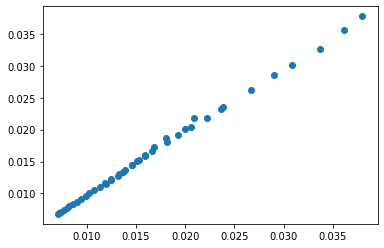

In [155]:
alldata=np.concatenate((oregon_smooth,princeton_smooth))
#turbulent data only
alldata=alldata[alldata[:,0]>4000]
Re2=alldata[:,0]
f2=alldata[:,1]

fhat2=Re2*0+0.01
for i in range(100):
    fhat2=1/(2*np.log10(0/3.7+2.51/Re2/np.sqrt(fhat2)))**2
plt.scatter(f2,fhat2) 

In [166]:
def func1(Re2,a1):
    fhat4=Re2*0+0.01
    for i in range(10):
        fhat4=1/(2*np.log10(0/a1[0]+a1[1]/Re2/np.sqrt(fhat2)))**2
    return fhat4
a1=[3.71,2.51]
func2 = lambda a1: np.dot(func1(Re2,a1)-f2,func1(Re2,a1)-f2)
print(func2(a1))
res1 = minimize(func2, a1, method='BFGS',options={'gtol': 1e-6, 'disp': True})
aa1=res1.x
print(func2(aa1))

6.022482860183099e-06
Optimization terminated successfully.
         Current function value: 0.000004
         Iterations: 4
         Function evaluations: 27
         Gradient evaluations: 9
4.2306537619593684e-06


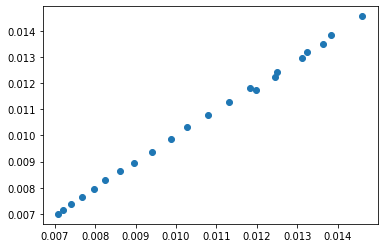

In [167]:
alldata=np.concatenate((oregon_smooth,princeton_smooth))
#turbulent data only
alldata=alldata[alldata[:,0]>300e3]
Re3=alldata[:,0]
f3=alldata[:,1]

fhat3=Re3*0+0.01
for i in range(100):
    fhat3=1/(1.930*np.log10(Re3*np.sqrt(fhat3))-0.537)**2
plt.scatter(f3,fhat3) 

In [168]:
def func3(Re3,a2):
    fhat3=Re3*0+0.01
    for i in range(10):
        fhat3=1/(a2[0]*np.log10(Re*np.sqrt(fhat3))-a2[1])**2
    return fhat3
a2=[1.930,0.537]
func4 = lambda a2: np.dot(func3(Re3,a2)-f3,func3(Re3,a2)-f3)
print(func2(a2))
res2 = minimize(func2, a2, method='BFGS',options={'gtol': 1e-6, 'disp': True})
aa2=res2.x
print(func2(aa2))
print(aa2)

0.001477989492911567
Optimization terminated successfully.
         Current function value: 0.000004
         Iterations: 9
         Function evaluations: 36
         Gradient evaluations: 12
4.230648898661178e-06
[1.93       2.61598002]


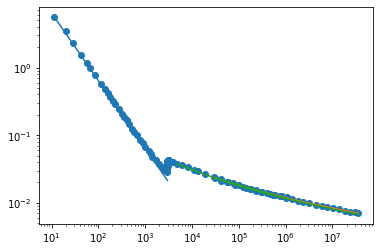

In [170]:
alldata=np.concatenate((oregon_smooth,princeton_smooth))
Re=alldata[:,0]
f=alldata[:,1]
Re1=Re[Re<3000]
plt.loglog(Re1,64/Re1)
plt.scatter(Re,f)
plt.loglog(Re3,fhat3)
plt.loglog(Re2,fhat2)